# Recommender Systems with Python

> References
> - [Recommender Systems: An Introduction](http://pzs.dstu.dp.ua/DataMining/recom/bibl/1jannach_dietmar_zanker_markus_felfernig_alexander_friedrich.pdf)

In this notebook, we will build a basic recommendation system that can suggest items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately, it just tells you what movies/items are most similar to your movie choice.

> Data sets: `u.data.tsv`, `Movie_Id_Title.csv`

There is another notebook: *Advanced Recommender System with Python* - that notebook goes into more detail with the same data sets.

In [1]:
import pandas as pd
import numpy as np

## Loading the Data

In [2]:
# Read in movie ratings data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
movie_ratings = pd.read_csv('u.data.tsv', sep='\t', names=column_names)

In [3]:
movie_ratings

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [4]:
# Read in the movie titles
movie_titles = pd.read_csv('Movie_Id_Title.csv')
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [5]:
# Merge two data sets together
movies_df = pd.merge(movie_ratings, movie_titles, on='item_id')
movies_df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


## Exploratory Data Analysis

### Importing Visualization Libraries

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

%matplotlib inline

In [7]:
# Group rows with the same movie title
title_groups = movies_df.groupby('title')
title_groups.count()

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41
...,...,...,...,...
Young Guns II (1990),44,44,44,44
"Young Poisoner's Handbook, The (1995)",41,41,41,41
Zeus and Roxanne (1997),6,6,6,6


In [8]:
# Check data type of the 'title_groups'
type(title_groups)

pandas.core.groupby.generic.DataFrameGroupBy

In [9]:
# Take only the 'rating' column of the DataFrameGroupBy 'title_groups'
grouped_ratings = title_groups['rating']
grouped_ratings

In [10]:
# Get average (mean) rating of each movie (sorted by descending order)
# Each movie is represented by 1 movie title
grouped_ratings.mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [11]:
# Get number of ratings for each movie (sorted by descending order)
# Each movie is represented by 1 movie title
grouped_ratings.count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [12]:
# Put mean of ratings into a DataFrame
ratings = pd.DataFrame(grouped_ratings.mean())
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [13]:
# Add a column for numbers of ratings
ratings['num of ratings'] = pd.DataFrame(grouped_ratings.count())
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

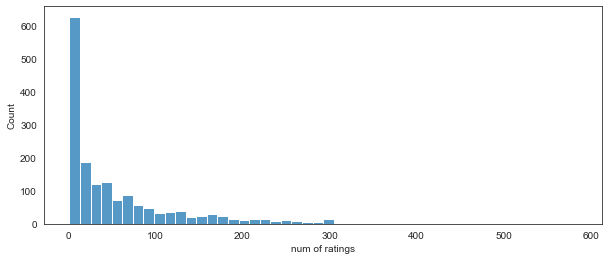

In [14]:
# Visualize number of ratings for different movies
plt.figure(figsize=(10, 4))
sns.histplot(data=ratings, x='num of ratings')

<AxesSubplot:xlabel='rating', ylabel='Count'>

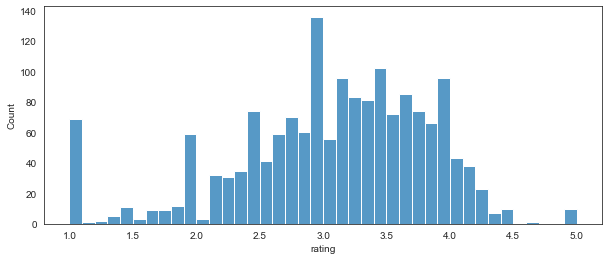

In [15]:
# Visualize the avg. of ratings
plt.figure(figsize=(10, 4))
sns.histplot(data=ratings, x='rating', binwidth=0.1)

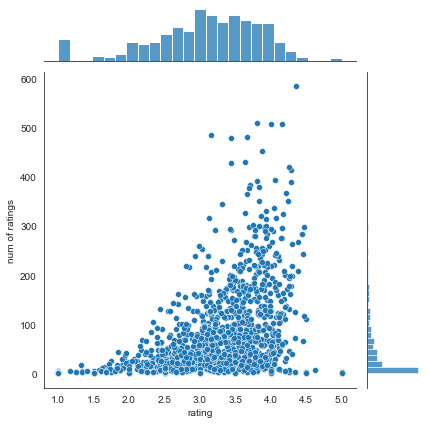

In [16]:
# Create a joint plot showing the (average/mean) `rating` vs. `num of ratings`
sns.jointplot(data=ratings, x='rating', y='num of ratings')

<font color=magenta>Now that we have a general idea of what the data looks like. Let's move on to creating a simple recommendation system.</font>

## Recommending Similar Movies

<font color=magenta>Now let's create a matrix that has the user ids (`user_id`) on one axis and the movie title (`title`) on another axis. Each cell will then consist of the rating user gave to that movie. Note there will be a lot of `NaN` values, because most people have not seen most of the movies.</font>

In [17]:
moviemat = movies_df.pivot_table(index='user_id', columns='title', values='rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Find the top most rated movies
ratings.sort_values('num of ratings', ascending=False)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [19]:
# Check that the 'ratings' DataFrame's row order was not changed
# after calling 'sort_values()' method
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<font color=magenta>
Let's grab the user ratings for two movies

- `Star Wars (1977)` - a sci-fi movie
- `Liar Liar (1997)` - a comedy movie
</font>

In [20]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [21]:
starwars_user_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [22]:
liarliar_user_ratings

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

<font color=magenta>We can the use `corrwith()` method to get pairwise correlations between two `Pandas series`

- `starwars_user_ratings`
- `liarliar_user_ratings`

and each column data of the `moviemat` DataFrame.
</font>

In [23]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\Users\hoang.tran\Desktop\Home\Workplace\AIMachineLearningDataScience\00-basics\env\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\hoang.tran\Desktop\Home\Workplace\AIMachineLearningDataScience\00-basics\env\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [24]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [25]:
similar_to_liarliar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [26]:
# Put the correlation values in a DataFrame and remove rows whose
# correlation is NaN
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


<font color=magenta>Now if we sort the `corr_starwars` dataframe by `Correlation`, we should get the most similar movies. However note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).</font>

In [27]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


<font color=magenta>Let's fix this by filtering out movies that have less than 100 `rating` reviews (this value was chosen based off the histogram from earlier).</font>

In [28]:
# Join the correlation dataframe for starwars with the ratings
# dataframe to get the number of ratings for each movie
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [29]:
# Now, take only movies whose `num of ratings` is greater than 100
# sort the dataframe `corr_starwars` by `Correlation` values,
# get the top most correlated movies.
corr_starwars[corr_starwars['num of ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


<font color=magenta>Now the same for the comedy movie Liar Liar:</font>

In [30]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
